# IRDM: Assignment 5

### Assignment (part 2, Supervised, 25%):
1. Explore the dataset. Do the descriptive statistics.
2. Explanatory data analysis. Exploring the features, visualizations etc. (https://
www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/ exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/ learning/what-is-exploratory-data-analysis/ )
3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. (https://www.kaggle.com/learn/feature-engineering, https:// www.kaggle.com/learn/data-cleaning )
4. Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc..
5. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.
6. Conclusion.

**Dataset Description:**
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender) 
- test_set.csv.

**Transactions.csv columns description:**
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15) - code - transaction code
- type - transaction type
- sum - sum of transaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

## 1. Explore the dataset. Do the descriptive statistics.

In [2]:
transactions = pd.read_csv('transactions.csv', sep=';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [4]:
codes = pd.read_csv('codes.csv', sep=";")
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
types = pd.read_csv('types.csv', sep=';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [7]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
train = pd.read_csv('train_set.csv', sep=';')
train.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [10]:
test = pd.read_csv('test_set.csv', sep=';')
test.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  2656 non-null   int64
dtypes: int64(1)
memory usage: 20.9 KB


In [12]:
print("Number of clients:", transactions.client_id.nunique())

Number of clients: 8656


In [13]:
print("Number of completed transactions:",transactions.code.nunique())

Number of completed transactions: 175


In [14]:
# Collecting all datasets 
combining = transactions.merge(train, how='left', on='client_id').copy()
combining_ = combining.merge(types, how='left', on='type').copy()
transaction = combining_.merge(codes, how='left', on='code').copy() 
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,NaN,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,NaN,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [15]:
transaction.shape

(130039, 8)

There are data about 130.039 transactions.

In [16]:
print("The number of 'н/д' rows:", len(transaction[transaction.type_description == 'н/д']))
transaction.drop(transaction[transaction.type_description == 'н/д'].index, inplace=True)

The number of 'н/д' rows: 122


In [17]:
transaction.target = transaction.sort_values(by='client_id').target.fillna(method='ffill')
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [18]:
days_time = [i for i in transaction.datetime.str.split(' ')]
days = [days_time[i][0] for i in range(len(days_time))]
days = [int(i) for i in days]

In [20]:
ymd = pd.date_range(end = '2020-12-31', periods = max(days)+1).tolist()
ymd

[Timestamp('2019-10-02 00:00:00', freq='D'),
 Timestamp('2019-10-03 00:00:00', freq='D'),
 Timestamp('2019-10-04 00:00:00', freq='D'),
 Timestamp('2019-10-05 00:00:00', freq='D'),
 Timestamp('2019-10-06 00:00:00', freq='D'),
 Timestamp('2019-10-07 00:00:00', freq='D'),
 Timestamp('2019-10-08 00:00:00', freq='D'),
 Timestamp('2019-10-09 00:00:00', freq='D'),
 Timestamp('2019-10-10 00:00:00', freq='D'),
 Timestamp('2019-10-11 00:00:00', freq='D'),
 Timestamp('2019-10-12 00:00:00', freq='D'),
 Timestamp('2019-10-13 00:00:00', freq='D'),
 Timestamp('2019-10-14 00:00:00', freq='D'),
 Timestamp('2019-10-15 00:00:00', freq='D'),
 Timestamp('2019-10-16 00:00:00', freq='D'),
 Timestamp('2019-10-17 00:00:00', freq='D'),
 Timestamp('2019-10-18 00:00:00', freq='D'),
 Timestamp('2019-10-19 00:00:00', freq='D'),
 Timestamp('2019-10-20 00:00:00', freq='D'),
 Timestamp('2019-10-21 00:00:00', freq='D'),
 Timestamp('2019-10-22 00:00:00', freq='D'),
 Timestamp('2019-10-23 00:00:00', freq='D'),
 Timestamp

In [21]:
transaction['date'] = [ymd[j] for i in range(len(days)) for j in range(max(days)+1) if days[i] == j]
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,date
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-26
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-13
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-26
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-21
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-03-01


In [22]:
transaction['income'] = transaction['sum'].where(transaction['sum'] > 0) 
transaction['spending'] = transaction['sum'].where(transaction['sum'] <= 0)
transaction = transaction.replace(np.nan, 0)

We have divided the column 'Sum' to income & spendings, because it's more logical and comfortable to work with transactions in such way. Income is positive values, when client funded a bank account, Spending is negative values, when withdraw money from a bank account.

### Descriptive statistics has two types: 

- Measures of central tendency (mean, median, mode, quartiles)
- Measures of dispersion (standard deviation, variance, range)

In [23]:
# Huge number of 0 values in our data because one person makes different transactions
income = transaction[transaction.income > 0].income
spending = transaction[transaction.spending < 0].spending

In [24]:
print('Average spendings of clients: ', round(np.mean(spending), 2))
print('Average income of clients: ', round(np.mean(income), 2))
print('-' * 40)
print('Median of spending: ', round(np.median(spending), 2))
print('Median of income: ', round(np.median(income), 2))
print('-' * 40)
print('Mode of spendings: ', spending.mode())
print('Mode of income: ', income.mode())
print('-' * 40)
print('Standard deviation of spendings of clients: ', round(np.std(spending), 2))
print('Standard deviation of income of clients: ', round(np.std(income), 2))

Average spendings of clients:  -61913.13
Average income of clients:  172174.28
----------------------------------------
Median of spending:  -8983.66
Median of income:  22459.16
----------------------------------------
Mode of spendings:  0   -2245.92
dtype: float64
Mode of income:  0    22459.16
dtype: float64
----------------------------------------
Standard deviation of spendings of clients:  323390.12
Standard deviation of income of clients:  1081321.27


**Using quartiles we can identify and count the number of outliers.**

In [25]:
Q1 = income.quantile(0.25)
Q3 = spending.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers=[]
for x in income:
    if ((x>upper) or (x<lower)):
         outliers.append(x)
print('There are', len(outliers), 'outlier incomes.')

There are 24311 outlier incomes.


## 2. Exploratory data analysis. Exploring the features, visualizations

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics often with visual methods. As we have already explored the datasets, let's visualize them.

### Visualization №1

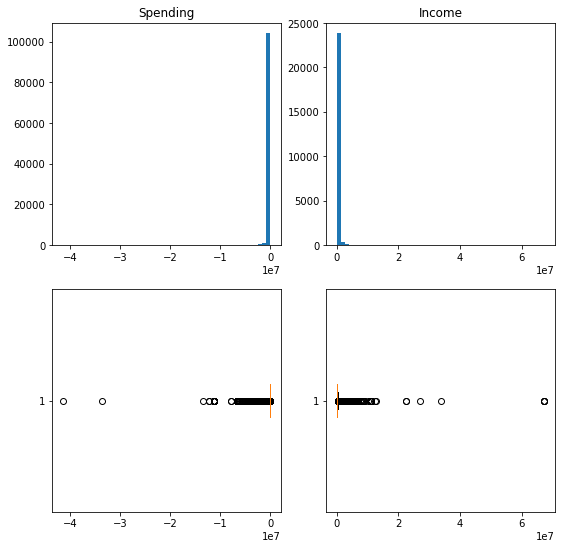

In [26]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(9,9))

ax[0,0].set_title('Spending')
ax[0,1].set_title('Income')

ax[0,0].hist(spending, 50);
ax[1,0].boxplot(spending, vert=False);

ax[0,1].hist(income, 50);
ax[1,1].boxplot(income, vert=False);

Given histograms and boxplots illustrates the outliers of income and spendings. There we can see that for income we have positive values, starting from 0, and for spending is vice versa.

### Visualization №2

In [27]:
vis2 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().head()
vis2.head()

,code_description,code
0,Финансовые институты — снятие наличности автом...,27917
1,Финансовые институты — снятие наличности вручную,18684
2,"Звонки с использованием телефонов, считывающих...",18641
3,"Бакалейные магазины, супермаркеты",18467
4,Денежные переводы,11355


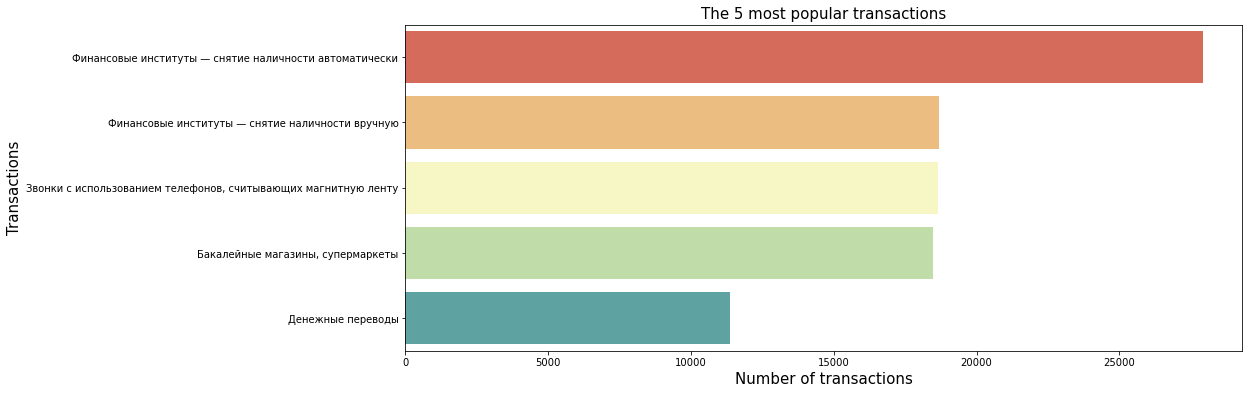

In [28]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = "Spectral", data=vis2)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most popular transactions',  size = 15)
plt.show()

The barchart represents five most popular transactions ever made. We grouped by code descriptions and summarized them. "Финансовые институты — снятие наличности автоматически" holds the first place with around 28000 transactions. It can be concluded that most people prefer automatic transactions in banks.

### Visualization №3

In [29]:
vis3 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().tail()
vis3

,code_description,code
170,Нефть и нефтепродукты,1
171,Почтовые услуги — только правительство,1
172,Агенты и менеджеры по аренде недвижимости,1
173,Разнообразные издательства/печатное дело,1
174,"Генеральные подрядчики по вентиляции, теплосна...",1


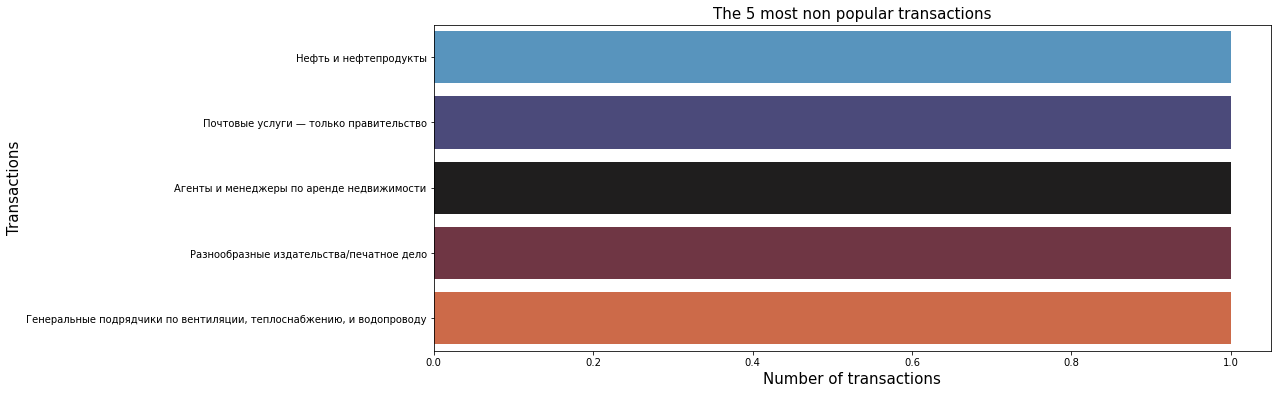

In [30]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = 'icefire', data=vis3)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most non popular transactions',  size = 15)
plt.show()

**Comment:** Here we represented the 5 most unpopular types of transactions. There are more than 5 transactions which were made only once. Some of the examples are 'Нефть и нефтепродукты', 'Почтовые услуги - только правительство'.

### Visualization №4

In [31]:
popular_transaction = transaction[transaction.code_description=="Финансовые институты — снятие наличности автоматически"] 
popular_transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,date,income,spending
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-26,0.00,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-13,67377.47,0.00
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-26,0.00,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-21,0.00,-3368873.66
15,2444292,355 09:47:45,6011,2010,-65131.56,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-09-21,0.00,-65131.56


In [32]:
#Extract years from date by saving them into a new column 
popular_transaction['year'] = pd.DatetimeIndex(popular_transaction['date']).year
popular_transaction['year']

<ipython-input-32-e82ba9bb069a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_transaction['year'] = pd.DatetimeIndex(popular_transaction['date']).year


0         2020
1         2020
2         2019
3         2020
15        2020
          ... 
130012    2020
130016    2020
130027    2020
130028    2020
130032    2020
Name: year, Length: 27917, dtype: int64

In [33]:
vis4 = popular_transaction.groupby("year")["code"].sum().reset_index()
vis4 = popular_transaction.rename(columns = {"sum":"code"})
vis4 = vis4.sort_values(by = "year", ascending = True)

In [34]:
num_of_year = vis4.groupby(['year'])['client_id'].count()
num_of_year

year
2019     5286
2020    22631
Name: client_id, dtype: int64

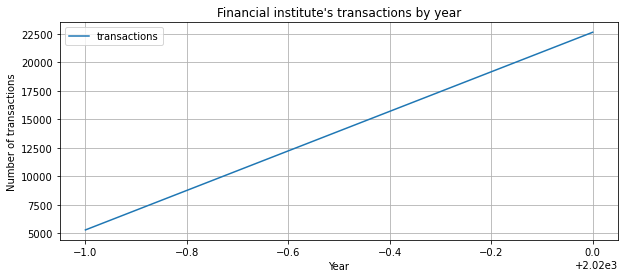

In [35]:
#Visualization of linear plot
plt.figure(figsize=(10,4))
plt.plot(num_of_year.index, num_of_year.values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.title("Financial institute's transactions by year")
plt.legend(["transactions"])
plt.show()

The linear plot shows the amount of Financial institute's transactions by year. The number of transactions keep rises from 5000 to 20000+ and then suddenly falls down at the start of 2020's year. If we look at the amount of transactions by each year, we may discover that almost all of the transactions are made in 2020.

## 3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. 

### RFM Analysis

Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.

In [36]:
rfm = transaction.groupby(by='client_id', as_index=False).date.max()
rfm['Frequency'] =  transaction.groupby(by='client_id').date.count().values
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'max_spending'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'min_spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'min_income'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'max_income'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'income'})
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [37]:
rfm.fillna(0, inplace=True)
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [38]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min()

client_id
22899         -8759.07
27914         -2245.92
28753      -1392467.78
31385        -56147.89
38084       -224591.58
               ...    
99967537    -336887.37
99984336    -179673.26
99985917    -224591.58
99991245     -67377.47
99999680    -449183.15
Name: sum, Length: 8577, dtype: float64

In [39]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max()

client_id
22899        -1122.96
27914        -2245.92
28753        -3368.87
31385         -291.97
38084          -44.92
              ...    
99967537   -336887.37
99984336   -179673.26
99985917   -224591.58
99991245    -16574.86
99999680     -1527.22
Name: sum, Length: 8577, dtype: float64

In [40]:
transaction_period = pd.date_range(start=transaction.date.min(),end = transaction.date.max(), periods = 4).tolist()
transaction_period

[Timestamp('2019-10-02 00:00:00'),
 Timestamp('2020-03-02 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-12-31 00:00:00')]

In [41]:
rfm['recent_range'] = pd.cut(rfm.date.values, 
                     transaction_period, 
                     right=False, 
                     labels=['old', 
                             'moderate', 
                             'recent'])

In [42]:
rfm.groupby(by='recent_range').date.count()

recent_range
old          205
moderate     601
recent      7566
Name: date, dtype: int64

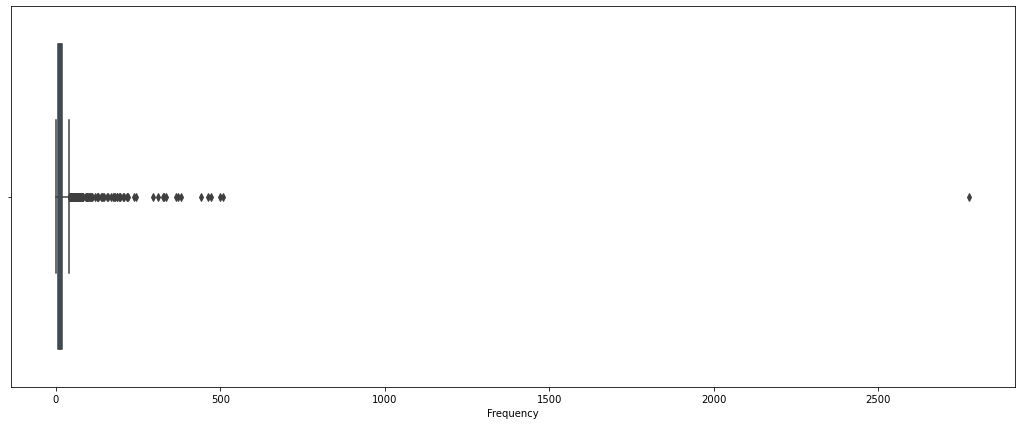

In [43]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rfm, x=rfm.Frequency);

In [44]:
Q1 = np.percentile(rfm.Frequency, 25)
Q3 = np.percentile(rfm.Frequency, 75)
IQR = Q3-Q1

upper = Q3 + 1.5*IQR
upper

40.0

In [45]:
rounding_to_nearest_int = math.ceil(upper/3)
conditions = [
    (rfm.Frequency < rounding_to_nearest_int),
    (rfm.Frequency >= rounding_to_nearest_int) & (rfm.Frequency < 2*rounding_to_nearest_int),
    (rfm.Frequency >= 2*rounding_to_nearest_int) & (rfm.Frequency <= upper) | (rfm.Frequency > upper)
    ]

values = ['seldom', 
          'not often',
          'very often']

rfm['frequency_range'] = np.select(conditions, values)

In [46]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often


In [47]:
rfm.groupby(by='frequency_range').Frequency.count()

frequency_range
not often     2440
seldom        5241
very often     975
Name: Frequency, dtype: int64

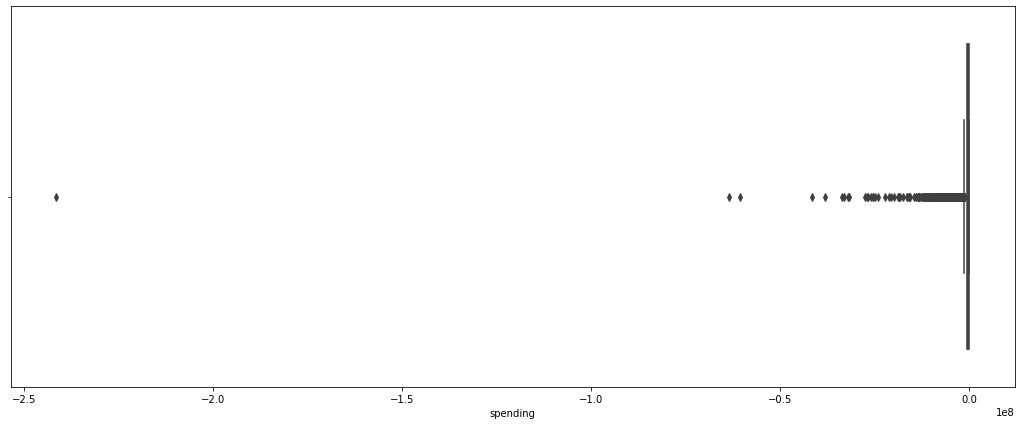

In [48]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rfm, x=rfm.spending);

In [49]:
Q1 = np.percentile(rfm.spending, 25)
Q3 = np.percentile(rfm.spending, 75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
lower

-1442779.2262499998

In [50]:
rounding_to_nearest_int = math.ceil(lower/3)
conditions = [
    (rfm.spending > rounding_to_nearest_int),
    (rfm.spending <= rounding_to_nearest_int) & (rfm.spending > 2*rounding_to_nearest_int),
    (rfm.spending <= 2*rounding_to_nearest_int) & (rfm.spending >= lower) | (rfm.spending < lower)
    ]

values = ['-small', 
          '-avg',
          '-large']

rfm['minus_amount'] = np.select(conditions, values)

In [51]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,-small
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,-small
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,-small
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large


In [52]:
rfm.minus_amount.value_counts()

-small    5904
-large    1420
-avg      1332
Name: minus_amount, dtype: int64

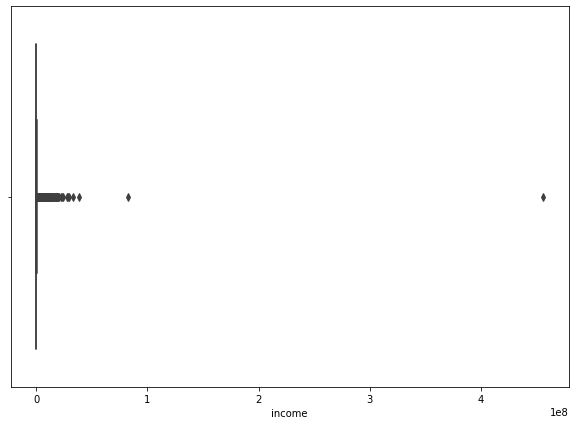

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rfm, x=rfm.income);

In [54]:
Q1 = np.percentile(rfm.income, 25)
Q3 = np.percentile(rfm.income, 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
upper

564988.2125

In [55]:
rounding_to_nearest_int = math.ceil(upper/3)
conditions = [
    (rfm.income < rounding_to_nearest_int),
    (rfm.income >= rounding_to_nearest_int) & (rfm.income < 2*rounding_to_nearest_int),
    (rfm.income >= 2*rounding_to_nearest_int) & (rfm.income <= upper) | (rfm.income > upper)
    ]

values = ['+small', 
          '+avg',
          '+large']

rfm['plus_amount'] = np.select(conditions, values)

In [56]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,-small,+small
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,-small,+small
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large,+large
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,-small,+small
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large,+large


In [57]:
rfm.plus_amount.value_counts()

+small    6243
+large    1638
+avg       775
Name: plus_amount, dtype: int64

In [58]:
re = {'old':1, 
      'moderately':2, 
      'recent':3}

fr = {'seldom':1, 
      'often':2,
      'very often':3}

mi = {'-small':3, 
      '-avg':2,
      '-large':1}

pl = {'+small':1, 
      '+avg':2,
      '+large':3}

rfm['re_range'] = rfm.recent_range.map(re)
rfm['fre_range'] = rfm.frequency_range.map(fr)
rfm['min_amount'] = rfm.minus_amount.map(mi)
rfm['pl_amount'] = rfm.plus_amount.map(pl)
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
0,22899,2020-12-16,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,-small,+small,3.0,1.0,3,1
1,27914,2020-07-20,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,-small,+small,NaN,1.0,3,1
2,28753,2020-12-08,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large,+large,3.0,1.0,1,3
3,31385,2020-08-11,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,-small,+small,3.0,1.0,3,1
4,38084,2020-12-04,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large,+large,3.0,NaN,1,3


In [59]:
# the worst clients (1111)
rfm[(rfm.re_range == 1) & (rfm.fre_range==1) & (rfm.min_amount==1) & (rfm.pl_amount==1)]

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
158,1798485,2019-11-14,7,-3368873.66,-5614.79,0.0,0.0,-3635531.24,0.0,old,seldom,-large,+small,1.0,1.0,1,1
2896,34179937,2020-01-28,2,-1684436.83,-26411.97,0.0,0.0,-1710848.80,0.0,old,seldom,-large,+small,1.0,1.0,1,1
6955,80698386,2019-11-02,2,-761365.45,-224591.58,0.0,0.0,-985957.03,0.0,old,seldom,-large,+small,1.0,1.0,1,1
7596,88062408,2020-01-16,1,-1122957.89,-1122957.89,0.0,0.0,-1122957.89,0.0,old,seldom,-large,+small,1.0,1.0,1,1


In [60]:
# the best clients (3333)
rfm[(rfm.re_range == 3) & (rfm.fre_range==3) & (rfm.min_amount==3) & (rfm.pl_amount==3)]

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
557,6506523,2020-12-24,53,-52734.10,-1122.96,875.91,898366.31,-247463.08,2883216.82,recent,very often,-small,+large,3.0,3.0,3,3
675,7927145,2020-12-30,39,-404264.84,-314.43,269.51,197640.59,-474791.12,523073.80,recent,very often,-small,+large,3.0,3.0,3,3
817,9605096,2020-12-27,30,-67377.47,-673.77,2245.92,774840.94,-270178.07,781017.21,recent,very often,-small,+large,3.0,3.0,3,3
845,9978856,2020-12-30,29,-29196.91,-449.18,112295.79,628856.42,-172620.43,1327336.23,recent,very often,-small,+large,3.0,3.0,3,3
921,10909988,2020-11-30,35,-67152.88,-673.77,224591.58,449183.15,-333835.17,673774.73,recent,very often,-small,+large,3.0,3.0,3,3
932,11089937,2020-12-26,28,-67377.47,-1122.96,11229.58,190902.84,-290668.21,487363.72,recent,very often,-small,+large,3.0,3.0,3,3
1144,13587967,2020-10-29,29,-89836.63,-1179.11,673774.73,673774.73,-469823.59,673774.73,recent,very often,-small,+large,3.0,3.0,3,3
1161,13775509,2020-12-17,29,-51633.60,-154.97,11229.58,381805.68,-193661.28,460412.74,recent,very often,-small,+large,3.0,3.0,3,3
1542,18139443,2020-12-24,28,-112295.79,-235.82,56147.89,669507.49,-351097.29,725655.38,recent,very often,-small,+large,3.0,3.0,3,3
1641,19409011,2020-12-04,33,-40426.48,-473.66,2270.85,449183.15,-281114.97,451454.00,recent,very often,-small,+large,3.0,3.0,3,3


## 4. Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc..

### K Nearest Neighbours

In [61]:
# rfm.dropna(inplace=True)

In [62]:
# rfm = rfm.merge(transaction.groupby(by='client_id').agg(pd.Series.mode), how='left', on='client_id')
# rfm.head()

In [63]:
# rfm = rfm.rename(columns={'target':'gender'})

In [64]:
# ndf=rfm.loc[:,'re_range':'pl_amount']
# ndf

In [65]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(ndf, rfm.gender, test_size=0.33, random_state=2022)

In [66]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# pred

In [67]:
# result = pd.DataFrame(data = np.array(y_test), columns=["Class"])
# result["predicted_class"] = clf.predict(X_test)
# result

In [68]:
# training_accuracy = [] 
# test_accuracy = []
# # try n_neighbors from 1 to 10 
# neighbors_settings = range(1, 11)

# for n_neighbors in neighbors_settings:
#     # build the model
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
#     clf.fit(X_train, y_train)
#     # record training set accuracy 
#     training_accuracy.append(clf.score(X_train, y_train)) 
#     # record generalization accuracy 
#     test_accuracy.append(clf.score(X_test, y_test))

In [69]:
# plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()

**Comment:** There we can see underfitting between train and test accuracies. Hence, it is a non normal model. For generalization of model we need to increase model complexity or remove noise from the data. 

In [70]:
# error_rate = []

# for i in range(1,40): # Checking every possible k value between 1-40
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))
    
# error_rate

In [71]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
# plt.title('Error rate vs K value')
# plt.xlabel('K value')
# plt.ylabel('Mean error rate');

In [72]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print (confusion_matrix(y_test, pred))
# print (classification_report(y_test, pred))
# print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

In [73]:
# knn = KNeighborsClassifier(n_neighbors=17)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print('-'*60)
# print(classification_report(y_test, y_pred))
# print('-'*60)
# print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

### Random Forest

In [74]:
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier(n_estimators=100, random_state=0) 
# forest.fit(X_train, y_train)

# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


In [75]:
# params = {
#     'max_depth': [2,3,5,10,20],
#     'min_samples_leaf': [5,10,20,50,100,200],
#     'n_estimators': [10,25,30,50,100,200]
# }

In [76]:
# from sklearn.model_selectiaon import GridSearchCV
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=forest,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

In [77]:
# %%time
# grid_search.fit(X_train, y_train)

In [78]:
# rf_best = grid_search.best_estimator_
# rf_best

In [79]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(80,40))

# plot_tree(rf_best.estimators_[5]
#           ,filled=True);

## 5. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.

In [80]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import average_precision_score

In [81]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

In [82]:
# from sklearn.metrics import confusion_matrix
# y_true = y_test
# y_predicted = rf.predict(X_test)
# confusion_matrix(y_true, y_predicted)

In [83]:
# probs = rf.predict_proba(X_test)

In [84]:
# malignant_probs = probs[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
# roc_auc = auc(fpr, tpr)

In [85]:
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [86]:
# precision_score(y_test, y_pred)

In [87]:
# recall_score(y_test, y_pred)

In [88]:
# f1_score(y_test, y_pred)

In [89]:
# from inspect import signature

# precision, recall, threshold = precision_recall_curve(y_test, y_pred)
# average_precision = average_precision_score(y_test, y_pred)
# step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
# plt.step(recall, precision, color='r', alpha=0.2, where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.0])
# plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision));

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
transaction['code_description']= label_encoder.fit_transform(transaction['code_description'])
transaction.head()

In [91]:
transaction = transaction.rename(columns={'target':'gender'})

In [92]:
transaction = transaction[transaction['type_description'].apply(lambda x: isinstance(x, (str, bytes)))]

In [93]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
transaction['type_description']= label_encoder.fit_transform(transaction['type_description'])
transaction.head()

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = transaction[['code_description']]
y = transaction['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # k=3
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

In [96]:
# error_rate = []

# for i in range(1,40): # Checking every possible k value between 1-40
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))

In [97]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
# plt.title('Error rate vs K value')
# plt.xlabel('K value')
# plt.ylabel('Mean error rate')

In [98]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

In [99]:
# Training the algorithm

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
# Evaluating the algorithm

print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

In [100]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

In [101]:
# klklkl

In [102]:
# # Grid search

# grid_param = {  
#     'n_estimators': [50, 80, 100, 120],
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [True, False],
#     'max_depth': [10,30,50],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_split': [3,9,20],
#     'min_samples_leaf': [1, 2, 4]
#     }

# gs = GridSearchCV(estimator=forest,  
#                      param_grid=grid_param,
#                      scoring='accuracy',
#                      cv=5,
#                      n_jobs=-1)

# gs.fit(X_train, y_train)

In [103]:
# print(gs.best_params_)

In [104]:
# # Training the tuned algorithm

# forest_tuned = RandomForestClassifier(n_estimators=100,
#                                       criterion= 'gini',
#                                       bootstrap= False,
#                                       max_depth= 10,
#                                       max_features= 'auto',
#                                       min_samples_split= 20,
#                                       min_samples_leaf= 1,
#                                       random_state=101)
# forest_tuned.fit(X_train, y_train)
# y_pred = forest_tuned.predict(X_test)

In [105]:
# # Evaluating the tuned algorithm

# print (confusion_matrix(y_test, y_pred))
# print (classification_report(y_test, y_pred))
# print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

In [106]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from pymystem3 import Mystem

import string
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

In [108]:
# Preprocess function
def preprocess_text(text):
    text = text.lower()
    tokens = mystem.lemmatize(text)
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [109]:
cleaned_code_description = []
for i in transaction.code_description.unique():
    cleaned_code_description.append(preprocess_text(i))
    
vectorizer1 = CountVectorizer().fit_transform(cleaned_code_description)
vector1 = vectorizer1.toarray()
vector_size1 = len(vector1)
vector1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
t = pd.read_csv('types.csv', sep=';')
cleaned_type_description = []
for i in t.type_description.unique():
    cleaned_type_description.append(preprocess_text(i))
    
vectorizer2 = CountVectorizer().fit_transform(cleaned_type_description)
vector2 = vectorizer2.toarray()
vector_size2 = len(vector2)
vector2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
A=pd.DataFrame(vector1)
B=pd.DataFrame(vector2)

In [112]:
X=pd.concat([B,A],join='outer',axis=1)
X.shape

(175, 531)

In [113]:
X

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [114]:
transaction=transaction.gender[:175]
transaction.head()

AttributeError: 'DataFrame' object has no attribute 'gender'

In [ ]:
transaction = transaction.rename(columns={'target':'gender'})
transaction.gender.shape

In [ ]:
x = np.array(X)
y = np.array(transaction['gender'])

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [ ]:
# gnbmodel = GaussianNB()
# gnbmodel.fit(X_train , y_train)
# y_pred = gnbmodel.predict(X_test)

In [ ]:
# transaction.gender

In [ ]:
# gender = pd.DataFrame(transaction.gender, columns=["gender"])
# gender

In [ ]:
# # Standardize the data to all be the same unit

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(gender.drop('gender', axis=1))

# # Transforming the data
# scaled_features = scaler.transform(gender.drop('gender', axis=1))
# scaled_features

In [ ]:
# df_feat = pd.DataFrame(scaled_features, columns=data.columns)
# df_feat.head()

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV

# X = df_feat
# y = gender['gender']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# gnbmodel = GaussianNB()
# gnbmodel.fit(X_train , y_train)
# y_pred = gnbmodel.predict(X_test)

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))